Original Data Head from breast-cancer.csv:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_wors

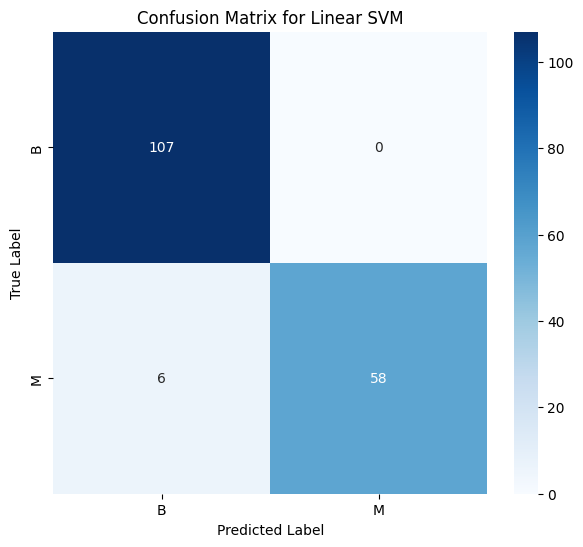


--- Training SVM with RBF Kernel ---
RBF SVM Accuracy: 0.9591

RBF SVM Classification Report:
               precision    recall  f1-score   support

           B       0.94      1.00      0.97       107
           M       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

RBF SVM Confusion Matrix:
 [[107   0]
 [  7  57]]


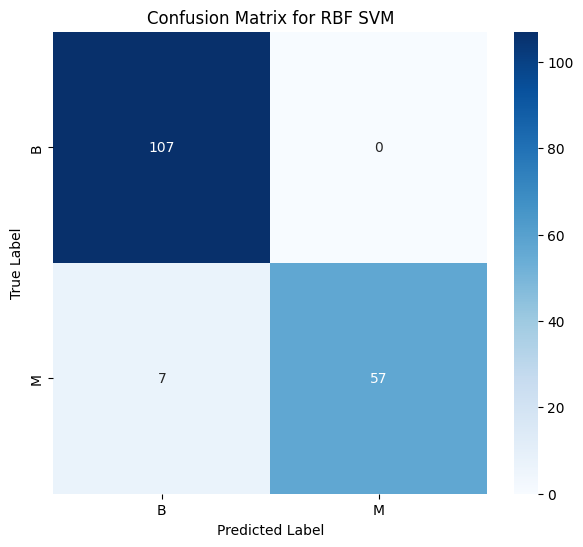

C:\Users\yuvan\AppData\Local\Temp\ipykernel_22720\1969512850.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2_f_scaled[:, 0], X_test_2_f_scaled[:, 1], c=y_test_2_f, marker='x', s=50, edgecolor='k', cmap=plt.cm.coolwarm, label='Test Data')


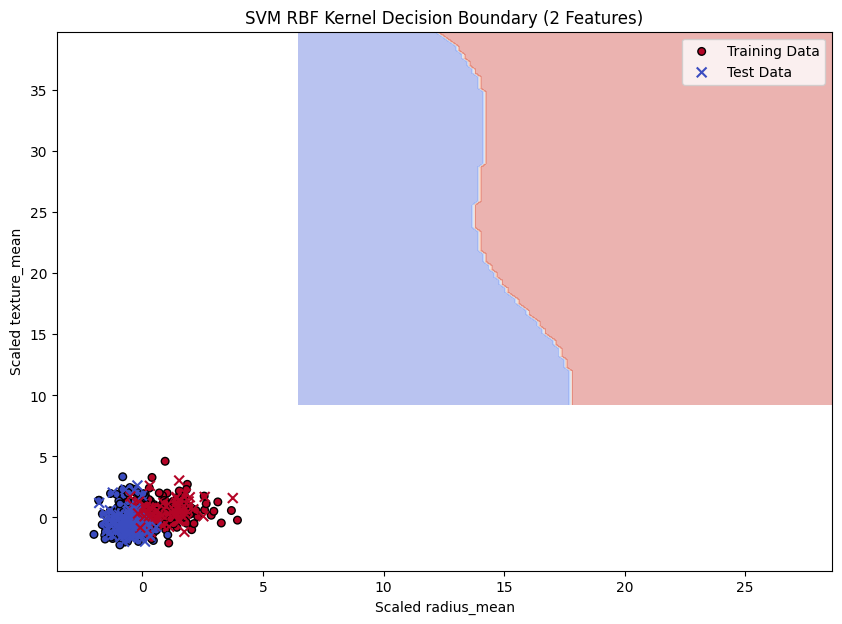


--- Hyperparameter Tuning with GridSearchCV (RBF Kernel) ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9698

Tuned RBF SVM Test Accuracy: 0.9532

Tuned RBF SVM Classification Report:
               precision    recall  f1-score   support

           B       0.93      1.00      0.96       107
           M       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171

Tuned RBF SVM Confusion Matrix:
 [[107   0]
 [  8  56]]


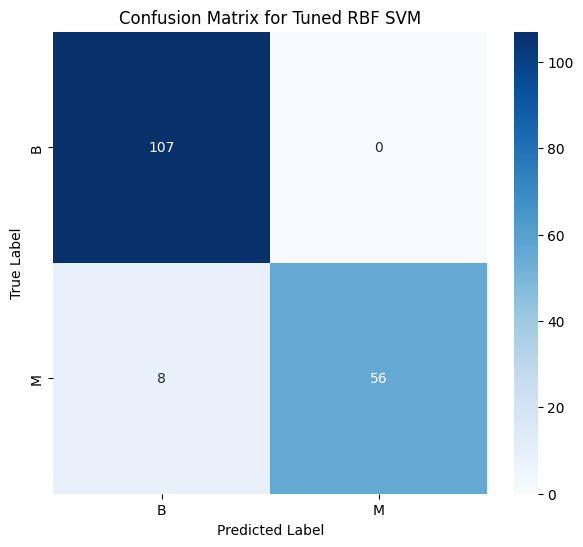


--- Cross-validation for the Best SVM Model ---
Cross-validation accuracies (5 folds): [0.975      0.975      0.9875     0.97468354 0.93670886]
Mean cross-validation accuracy: 0.9698
Standard deviation of cross-validation accuracies: 0.0172

--- Task Complete! ---
Remember to put your code, any plots/screenshots, and a README.md file in a GitHub repository.
The README.md should explain what you did, the steps you followed, and your observations.
Finally, submit the GitHub repo link.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# --- Step 1: Load and prepare a dataset for binary classification. ---

# Load the Breast Cancer dataset from the provided CSV file
try:
    df = pd.read_csv(r"D:\ML PROJECTS\elevate labs intenship\task 7\breast-cancer.csv")
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found. Please ensure the file is uploaded correctly.")
    exit()

print("Original Data Head from breast-cancer.csv:")
print(df.head())

# Inspect the dataset for column names and types
print("\nDataFrame Info:")
df.info()

# Drop the 'id' column if it exists and is not a feature
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# The 'Unnamed: 32' column often appears in this dataset as an empty column, drop it if it exists
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

# Identify features (X) and target (y)
# 'diagnosis' is typically the target column: 'M' for Malignant, 'B' for Benign
X = df.drop('diagnosis', axis=1).values
y_labels = df['diagnosis'].values

# Encode the target variable ('M'/'B' to 1/0)
le = LabelEncoder()
y = le.fit_transform(y_labels) # 'B' will typically be 0, 'M' will be 1
target_names = le.classes_ # ['B', 'M']

print(f"\nTarget Labels (encoded): {np.unique(y)}")
print(f"Original Target Names: {target_names}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled Data (first 5 rows of training set):")
print(X_train_scaled[:5])

# --- Step 2: Train an SVM with linear and RBF kernel. ---

print("\n--- Training SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nLinear SVM Classification Report:\n", classification_report(y_test, y_pred_linear, target_names=target_names))
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Plot confusion matrix for Linear SVM
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("\n--- Training SVM with RBF Kernel ---")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"RBF SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nRBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf, target_names=target_names))
print("RBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Plot confusion matrix for RBF SVM
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Step 3: Visualize decision boundary using 2D data. ---
# For visualization, we'll select two features (e.g., 'mean radius' and 'mean texture').
# Let's find their original column indices.
feature_names = df.drop('diagnosis', axis=1).columns.tolist()
# Assuming 'mean radius' is the first feature (index 0) and 'mean texture' is the second (index 1)
# You might need to adjust these indices based on your actual CSV column order
feature_1_idx = 0 # Example: 'mean radius'
feature_2_idx = 1 # Example: 'mean texture'

# Re-prepare data for visualization with only 2 features
X_2_features = X[:, [feature_1_idx, feature_2_idx]]
y_2_features = y

# Split and scale these two features
X_train_2_f, X_test_2_f, y_train_2_f, y_test_2_f = train_test_split(X_2_features, y_2_features, test_size=0.3, random_state=42, stratify=y_2_features)
scaler_2_f = StandardScaler()
X_train_2_f_scaled = scaler_2_f.fit_transform(X_train_2_f)
X_test_2_f_scaled = scaler_2_f.transform(X_test_2_f)

# Train a new RBF SVM on the 2-feature scaled data for visualization
# Using parameters from tuning later for a better boundary, or default if tuning not yet done.
svm_visualize = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42) # Example C and gamma, will be tuned later
svm_visualize.fit(X_train_2_f_scaled, y_train_2_f)

# Create a mesh grid
x_min, x_max = X_2_features[:, 0].min() - 0.5, X_2_features[:, 0].max() + 0.5
y_min, y_max = X_2_features[:, 1].min() - 0.5, X_2_features[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the mesh grid (remember to scale the mesh points)
Z = svm_visualize.predict(scaler_2_f.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2_f_scaled[:, 0], X_train_2_f_scaled[:, 1], c=y_train_2_f, s=30, edgecolor='k', cmap=plt.cm.coolwarm, label='Training Data')
plt.scatter(X_test_2_f_scaled[:, 0], X_test_2_f_scaled[:, 1], c=y_test_2_f, marker='x', s=50, edgecolor='k', cmap=plt.cm.coolwarm, label='Test Data')
plt.xlabel(f'Scaled {feature_names[feature_1_idx]}')
plt.ylabel(f'Scaled {feature_names[feature_2_idx]}')
plt.title('SVM RBF Kernel Decision Boundary (2 Features)')
plt.legend()
plt.show()

# --- Step 4 & 5: Tune hyperparameters like C and gamma and Use cross-validation to evaluate performance. ---

print("\n--- Hyperparameter Tuning with GridSearchCV (RBF Kernel) ---")

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # Only RBF kernel for tuning gamma
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test_scaled)

print(f"\nTuned RBF SVM Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nTuned RBF SVM Classification Report:\n", classification_report(y_test, y_pred_tuned, target_names=target_names))
print("Tuned RBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

# Plot confusion matrix for Tuned RBF SVM
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Tuned RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Example of using cross_val_score directly (if not using GridSearchCV for tuning)
print("\n--- Cross-validation for the Best SVM Model ---")
# Use the best_svm found from GridSearchCV for cross-validation
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracies (5 folds): {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracies: {np.std(cv_scores):.4f}")


print("\n--- Task Complete! ---")
print("Remember to put your code, any plots/screenshots, and a README.md file in a GitHub repository.")
print("The README.md should explain what you did, the steps you followed, and your observations.")
print("Finally, submit the GitHub repo link.")